data location: 
https://www.synapse.org/#!Synapse:syn11415602/wiki/492470

##### static code

In [1]:
import pandas as pd
import numpy as np

technical_meta_dir='./meta_data/'+'technical_meta_df.pickle'
biological_meta_dir='./meta_data/reformatted_biological_meta_df.pickle'
data_matrix_dir_fmt='./RNAseq/{specie}__allSRAmatrix.realign.v9.base.{feature}.gene.symbol'

def loadDf(fname,mmap_mode='r'):
    with open(fname+'.index.txt') as f:
        myIndex=map(lambda s:s.replace("\n",""), f.readlines())
    with open(fname+'.columns.txt') as f:
        myColumns=map(lambda s:s.replace("\n",""), f.readlines())
    tmpMatrix=np.load(fname+".npy",mmap_mode=mmap_mode)
    tmpDf=pd.DataFrame(tmpMatrix,index=myIndex,columns=myColumns)
    tmpDf.columns.name='Run'
    return tmpDf

# parameter
feature: select the unit of expression matrix

specie: mmGRC38=mouse, hgGRC38=human

In [2]:
feature='TPM' ### ['NumReads','TPM','EffectiveLength']
specie='mmGRC38' ### ['mmGRC38','hgGRC38']

# loading in data

In [3]:
data_matrix_dir=data_matrix_dir_fmt.format(specie=specie,feature=feature)
data_matrix_df=loadDf(data_matrix_dir)
technical_meta_df=pd.read_pickle(technical_meta_dir)
bio_meta_df=pd.read_pickle(biological_meta_dir)
data_matrix_df.index.name='Gene'

#### Biological meta data
For more information about bio_meta_df columns:

Sample: https://www.ncbi.nlm.nih.gov/books/NBK56913/

attribute: https://www.ncbi.nlm.nih.gov/biosample/docs/attributes/

NCIT_Eng, NCIT_ID: https://ncit.nci.nih.gov/

NLM_CUI: https://www.nlm.nih.gov/research/umls/new_users/online_learning/Meta_005.html

In [4]:
bio_meta_df.head()

metamap_score
Sample    attribute       NCIT_Eng                    NCIT_ID NLM_CUI                
DRS000577 SCIENTIFIC NAME Human                       C14225  C0086418           1000
          TITLE           HeLa                        C20226  C0018873            694
          sample comment  Dietary Supplement          C1505   C0242295            719
                          Media                       C19442  C0009458            753
                          Microbial Culture Procedure C25300  C0430400            719

#### Data matrix:  gene x RUN, TPM

In [5]:
data_matrix_df.head()

Run,SRR824488,SRR824489,SRR824480,SRR824481,SRR824482,SRR824483,SRR824484,SRR824485,SRR824486,SRR824487,...,SRR4124923,SRR4124922,SRR1042202,ERR424411,SRR3943270,SRR5277353,SRR1953372,SRR5036033,SRR1953370,SRR1042203
Gene,,,,,,,,,,,,,,,,,,,,,
0610007P14Rik,47.645115,61.570923,94.948929,72.175430,94.000130,127.588326,80.815292,94.475388,53.271595,61.684120,...,39.646103,50.984730,76.046227,0.000,95.495850,23.653757,0.0,58.037800,0.0,34.819164
0610009B22Rik,20.204000,18.716000,25.820311,22.494400,26.111500,37.977901,17.224501,17.491699,21.260201,23.178942,...,82.620903,57.243301,22.381500,0.000,65.543800,46.451439,0.0,9.580230,0.0,25.710510
0610009L18Rik,0.000000,0.297714,0.000000,0.484105,0.374632,0.546908,0.854471,0.000000,0.345700,0.000000,...,0.000000,3.093430,0.931392,0.000,4.479150,13.584700,0.0,12.593900,0.0,2.254990
0610009O20Rik,10.136000,8.200560,16.796301,11.127600,15.087500,14.441200,14.608800,11.277400,12.477500,9.766560,...,7.220710,14.300800,13.152000,0.000,30.030001,33.675800,0.0,33.818298,0.0,8.765140
0610010F05Rik,5.403077,5.741579,7.128706,4.420500,7.657201,2.837450,7.391000,6.362878,5.104922,7.485619,...,3.277690,4.889310,15.123750,10.029,26.780392,20.806711,0.0,7.977206,0.0,11.353485


#### Technical meta data  
For more information about the aliases used in the follow meta data:

https://www.ncbi.nlm.nih.gov/books/NBK56913/

In short, a Study can have multiple Samples. And each Sample can have multiple Runs.

In [6]:
technical_meta_df.head()

,Sample,percent_reads_aligned,total_num_reads_aligned,ScientificName,Run,Experiment,Study,LibraryStrategy,proj_accession_BioProject,proj_accession_BioSample,proj_accession_Spots,proj_accession_Bases,proj_accession_Loaded,proj_accession_Visibility,proj_accession_Center,proj_accession_Type
Run,,,,,,,,,,,,,,,,
DRR001495,DRS001031,0.838307,1.545869e+07,Mus musculus,DRR001495,DRX001049,DRP000467,RNA-Seq,PRJDA72887,SAMD00009639,18440370,737614800,1.0,public,KUFMS,RUN
DRR013953,DRS012237,0.737864,2.532644e+07,Mus musculus,DRR013953,DRX012494,DRP001187,RNA-Seq,PRJDB1816,SAMD00000826,34323970,1235662920,1.0,public,UT_IMS,RUN
DRR014321,DRS012644,0.660915,9.894079e+07,Mus musculus,DRR014321,DRX012847,DRP001272,RNA-Seq,PRJDB2383,SAMD00010831,149702638,5389294968,1.0,public,OSAKA_WPI,RUN
DRR018342,DRS016026,0.014581,1.992519e+05,Mus musculus,DRR018342,DRX016569,DRP002295,RNA-Seq,PRJDB2714,SAMD00013886,13664748,2760279096,1.0,public,UT_CB,RUN
DRR022426,DRS020465,0.904982,3.458027e+07,Mus musculus,DRR022426,DRX020487,DRP002705,RNA-Seq,PRJDB3075,SAMD00019355,38211020,1948762020,1.0,public,KUFMS,RUN


# example application: compare Trbc1 expression in T-Lymphocyte against B-Lymphyte

The purpose of this demo is show that unified meta-data and expression matrices enable simple data querying across many studies. 

### select terms for querying

In [7]:
queryTerms=['T-Lymphocyte','B-Lymphocyte'] #,

### subset the matrix

In [8]:
#slice out meta data with RNAseq data
subDf=bio_meta_df[bio_meta_df.index.get_level_values('Sample').isin(technical_meta_df.Sample)]
#slice 
hitDf=subDf[
    subDf.index.get_level_values('NCIT_Eng').isin(queryTerms)].reset_index()
ncitDf=hitDf.drop_duplicates(['Sample','NCIT_Eng'])
### drop the terms if there are multi mapping
sampleToTermS=ncitDf.set_index('Sample')['NCIT_Eng']
technical_meta_df['Label']=sampleToTermS.loc[technical_meta_df.Sample].values
hitMetaDf=technical_meta_df.dropna()
multI=hitMetaDf.set_index(['Label','Study','Sample','Run']).index
sub_data_df=data_matrix_df.loc[:,multI.get_level_values('Run')]
sub_data_df.columns=multI
sub_data_df.sort_index(axis=1).head()

Label         B-Lymphocyte                                              \
Study            ERP005595  SRP013758                                    
Sample           ERS436615  SRS346039  SRS346040  SRS346041  SRS346042   
Run              ERR478947  SRR513453  SRR513454  SRR513455  SRR513456   
Gene                                                                     
0610007P14Rik   137.698959  62.630241  55.067730  51.607529  47.846607   
0610009B22Rik     8.667200  17.552435  16.949800  14.764000  15.426800   
0610009L18Rik     1.331810   1.314280   1.420250   2.752700   1.241890   
0610009O20Rik    18.035200  36.950802  36.186798  44.325199  38.778702   
0610010F05Rik    10.586382  14.669912  14.347629  13.182166  12.958086   

Label                                                                      \
Study           SRP014923                                                   
Sample          SRS358739                                                   
Run             SRR545761   SRR545762   SRR545763   SRR545764   SRR545765   
Gene                                                                        
0610007P14Rik  154.967361  156.555878  134.671753  157.081543  139.406799   
0610009B22Rik   14.723700   17.380400   16.316999   15.539500   25.816601   
0610009L18Rik    0.000000    0.726719    0.000000    0.000000    0.000000   
0610009O20Rik   12.015700   13.667100   11.706300    9.682830   13.270600   
0610010F05Rik    7.961160    7.479867    8.887610    7.431092    8.787830   

Label            ...     T-Lymphocyte                                   \
Study            ...        SRP070814                        SRP070847   
Sample           ...       SRS1310084                       SRS1313780   
Run              ...       SRR3187252 SRR3187253 SRR3187254 SRR3193268   
Gene             ...                                                     
0610007P14Rik    ...        61.823391  68.193024  79.843422  63.510990   
0610009B22Rik    ...        12.514400  12.911600  16.719801   7.909940   
0610009L18Rik    ...         2.113150   1.954680   1.359360   0.000000   
0610009O20Rik    ...        10.437100  10.397000  11.620400   7.360860   
0610010F05Rik    ...         6.569407   5.143556   6.606000   3.268957   

Label                                                                 \
Study                                SRP072343             SRP073294   
Sample        SRS1313787 SRS1313792 SRS1361234 SRS1361239 SRS1396820   
Run           SRR3193276 SRR3193279 SRR3293922 SRR3293917 SRR3382900   
Gene                                                                   
0610007P14Rik  26.841133  46.123699  50.215862  50.395020  66.045341   
0610009B22Rik   3.625680   3.471870   9.919087   9.531970  21.705700   
0610009L18Rik   3.372420   9.506940   2.065220   5.139080   8.137200   
0610009O20Rik  10.577300   8.417280  12.720800  18.713800  15.352200   
0610010F05Rik   7.089855  10.441701   5.562897   5.732944  14.288864   

Label                     
Study                     
Sample        SRS1396821  
Run           SRR3382899  
Gene                      
0610007P14Rik  45.278030  
0610009B22Rik  16.840500  
0610009L18Rik   8.301030  
0610009O20Rik  11.727400  
0610010F05Rik   6.336696  

[5 rows x 651 columns]

### data summary by study

In [9]:
tmpS=sub_data_df.groupby(level=['Label','Study'],axis=1).size().sort_values(ascending=False)
tmpS.name='# of samples'
print 'Breakdown the summary by top studies\n\n',tmpS.head(n=20)

Breakdown the summary by top studies

Label         Study    
B-Lymphocyte  SRP071058    48
T-Lymphocyte  SRP026197    45
              SRP044164    36
B-Lymphocyte  SRP014923    36
T-Lymphocyte  SRP070814    28
B-Lymphocyte  SRP045501    26
T-Lymphocyte  SRP056859    24
B-Lymphocyte  SRP074202    24
              SRP069831    21
              SRP049105    14
              SRP063508    14
T-Lymphocyte  ERP013319    14
B-Lymphocyte  SRP051155    13
              SRP060364    12
T-Lymphocyte  SRP045460    12
B-Lymphocyte  SRP058205    11
              SRP034693    11
              SRP058206    10
              SRP056238    10
T-Lymphocyte  SRP041829    10
Name: # of samples, dtype: int64


after data aggregation

### amount of data aggregated

In [10]:
sub_data_df.groupby(level=0,axis=1).size()

Label
B-Lymphocyte    397
T-Lymphocyte    254
dtype: int64

## example application: querying Trbc1 (T cell receptor beta, constant region 1) expression

Trbc1 expression should be higher in T-cell as compared to B-cell

In [11]:
inGene=u'Trbc1'

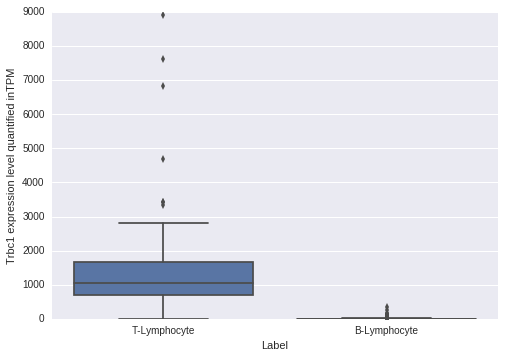

In [12]:
%matplotlib inline 
import seaborn as sns
ax=sns.boxplot(data=sub_data_df.loc[inGene].reset_index(),x='Label',y=inGene)
ax.set_ylabel(inGene+' expression level quantified in'+feature)